In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from gs_classifier import gs_classifier_train

Solution: [-0.18676243 -0.34518957  1.37523822]
Elapsed Time: 1.515824794769287
Loss: 0.04802299040656188


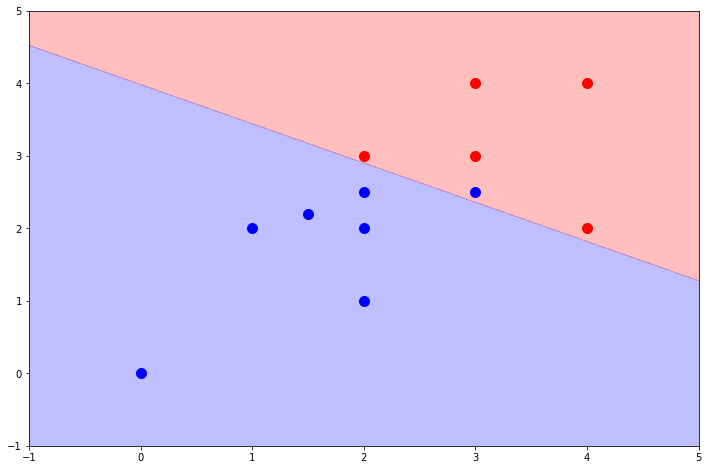

In [6]:
# Definir datos de prueba (estos datos no son separables linealmente)
dataset = np.array([
    [0, 0, 1],
    [2, 1, 1],
    [2, 2, 1],
    [3, 3, -1],
    [3, 4, -1],
    [1.5, 2.2, 1],
    [4., 2., -1],
    [1, 2, 1],
    [3, 2.5, 1],
    [4, 4, -1],
    [2, 3, -1],
    [2,2.5,1]
])

# Resolver el vector de pesos
t0 = time.time()
xf, loss = gs_classifier_train(dataset, maxloss=.1)
t1 = time.time()

print('Solution: {}'.format(xf))
print('Elapsed Time: {}'.format(t1-t0))
print('Loss: {}'.format(loss))

# Graficar la solucion
i = dataset[:,2] == 1
j = dataset[:,2] == -1

plt.figure(figsize=(12,8))
plt.ylim((dataset[:,1].min()-1, dataset[:,1].max()+1))
plt.xlim((dataset[:,0].min()-1, dataset[:,0].max()+1))

X,Y = np.meshgrid(
    np.linspace(*plt.xlim(), num=10),
    np.linspace(*plt.ylim(), num=10)
)
Z = X * xf[0] + Y * xf[1] + xf[2]

plt.contourf(X,Y,Z, colors=('#ff0000','#0000ff'), levels=(Z.min()-1,0,Z.max()+1), alpha=0.25, extend='both')
plt.plot(dataset[i,0], dataset[i,1], 'bo', dataset[j,0], dataset[j,1], 'ro', markersize=10)
plt.show()

Vemos que aunque los datos son inseparables linealmente, el algoritmo converge y la solución resulta aceptable